In [2]:
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
import numpy as np

In [3]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [4]:
df = pd.read_feather('../data/clened_houses_data.feather')

## Exploración

In [5]:
df.head()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 995 entries, 0 to 994
Columns: 167 entries, id to Área Urbana
dtypes: datetime64[ns](1), float64(6), int64(154), object(6)
memory usage: 1.3+ MB


In [6]:
df['neighbourhood'].value_counts()

neighbourhood
Engativá                                   45
Suba                                       30
Colina Campestre                           24
Fontibon                                   19
Cedritos                                   19
Usaquen                                    18
Bogotá                                     18
Modelia                                    16
Niza                                       15
Teusaquillo                                14
Kennedy Central                            12
San jose de bavaria                        12
Cerros de Suba                             11
Barrios Unidos                             11
Castilla                                   10
Chapinero                                  10
Normandia                                  10
Kennedy                                     9
Tintala                                     8
Los andes                                   8
Guaymaral                                   8
La Floresta         

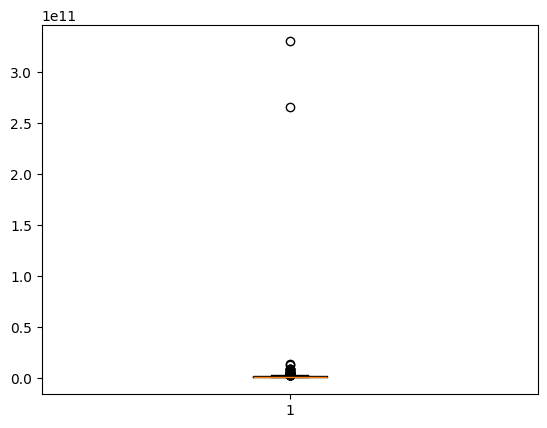

In [7]:
plt.boxplot(df['fixed_price'])
plt.show()

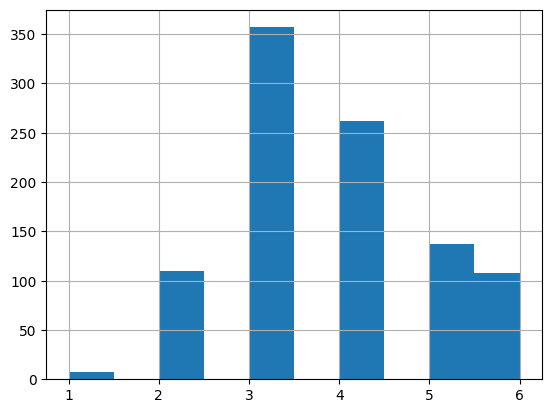

In [8]:
df['stratum'].hist()
plt.show()

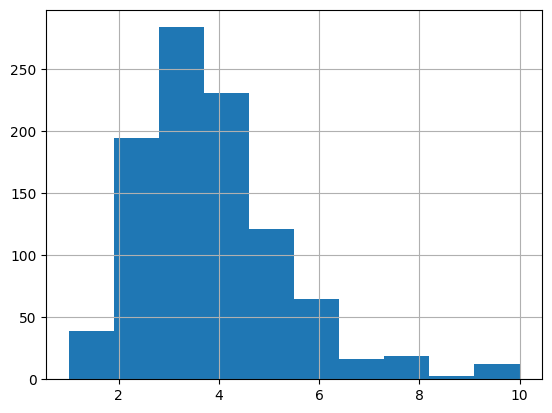

In [9]:
df['bathrooms'].hist()
plt.show()

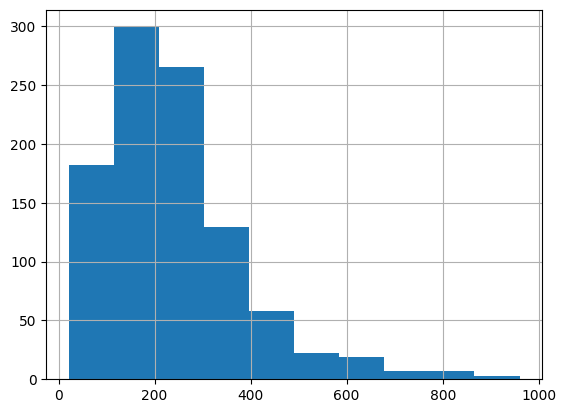

In [10]:
df['built_area'].hist()
plt.show()

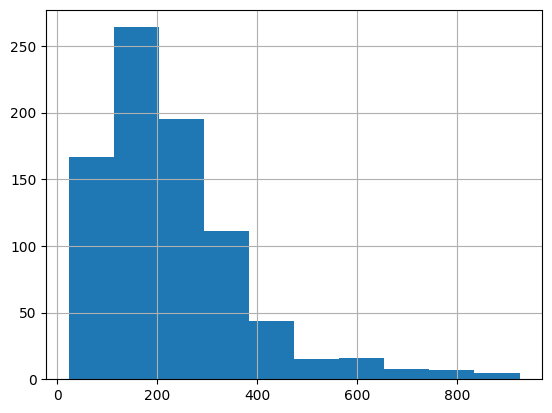

In [11]:
df['private_area'].hist()
plt.show()

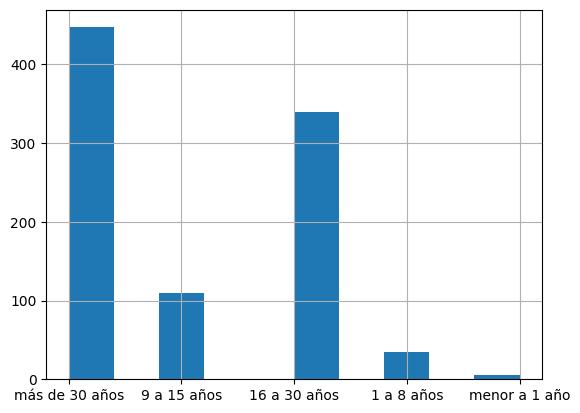

In [12]:
df['age'].hist()
plt.show()

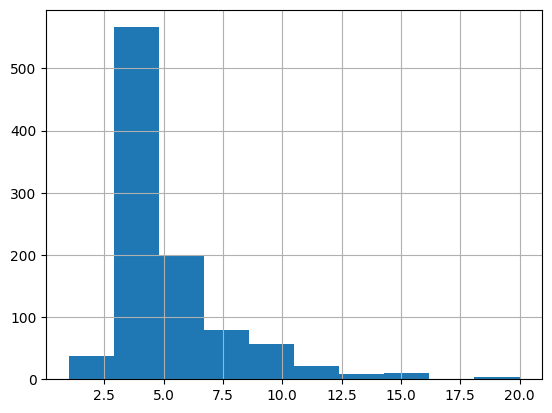

In [13]:
df['rooms'].hist()
plt.show()

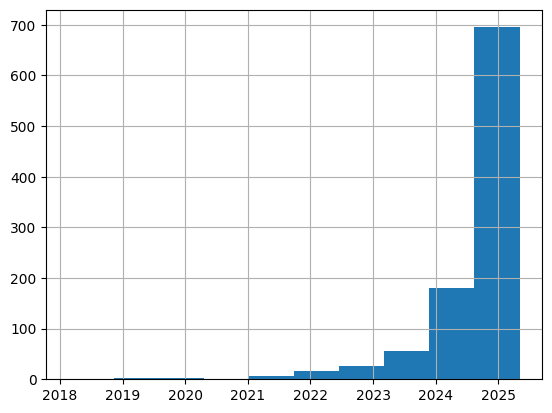

In [14]:
df['registered_date'].hist()
plt.show()

In [15]:
df.query('built_area == private_area')['id'].count()

np.int64(614)

In [16]:
df['fixed_price'].sort_values(ascending=False)

173    3.300000e+11
892    2.656000e+11
160    1.300000e+10
783    1.200000e+10
157    8.500000e+09
883    8.500000e+09
180    8.500000e+09
242    8.500000e+09
388    7.500000e+09
159    6.800000e+09
661    5.700000e+09
696    5.446959e+09
258    5.000000e+09
354    5.000000e+09
428    5.000000e+09
929    4.500000e+09
163    4.500000e+09
454    4.500000e+09
478    4.490000e+09
935    4.440000e+09
889    4.400000e+09
441    4.350000e+09
235    4.350000e+09
990    4.200000e+09
335    4.200000e+09
472    4.000000e+09
40     3.975000e+09
158    3.900000e+09
289    3.870000e+09
314    3.800000e+09
510    3.800000e+09
162    3.600000e+09
56     3.550000e+09
528    3.500000e+09
294    3.500000e+09
977    3.500000e+09
416    3.400000e+09
42     3.400000e+09
186    3.300000e+09
253    3.300000e+09
264    3.300000e+09
257    3.200000e+09
394    3.200000e+09
304    3.100000e+09
797    3.000000e+09
785    3.000000e+09
184    3.000000e+09
839    3.000000e+09
147    2.950000e+09
491    2.950000e+09


## Pretratamiento de datos

In [17]:
df_copy = df.copy()

In [18]:
df.isna().sum()

id                                 0
neighbourhood                      0
fixed_price                        0
stratum                           14
type                               0
status                           877
bathrooms                         10
built_area                         4
private_area                     163
age                               58
rooms                             12
rs_agent                           0
registered_date                    8
Acceso Pavimentado                 0
Aire Acondicionado                 0
Alarma                             0
Alarma Contra Incendio             0
Alcantarillado                     0
Altura libre                       0
Altura restringida                 0
Amoblado                           0
Asador                             0
Ascensor                           0
Ascensor(es) inteligente(s)        0
Auditorio                          0
Bahias de parqueo                  0
Bahía exterior de parqueo          0
B

In [19]:
df_copy.duplicated().sum()

np.int64(0)

In [20]:
# Rellenar los valores nulos de la variable built_area en caso de que la variable private_area si los tenga
def fill_built_area(data):
    if pd.isna(data['built_area']) and pd.notna(data['private_area']):
        data['built_area'] = data['private_area']
    return data
def fill_private_area(data):
    if pd.isna(data['private_area']) and pd.notna(data['built_area']):
        data['private_area'] = data['built_area']
    return data
df_copy = df_copy.apply(fill_built_area, axis=1)
df_copy = df_copy.apply(fill_private_area, axis=1)

In [21]:
# Le da formato a todos los barrios
def format_neighbourhoods(data):
    return data.strip().lower()
df_copy['neighbourhood'] = df_copy['neighbourhood'].apply(format_neighbourhoods)

In [22]:
# Asgina un estrato a los barrios que no tienes estrato, basado en los barrios ya preexistentes
list_neighbourhood_stratum = df_copy.groupby(by=['neighbourhood'],as_index=False)['stratum'].max()
def filter_neighbourhoods(data):
    if pd.isna(data['stratum']):
        if data['neighbourhood'] in list_neighbourhood_stratum['neighbourhood'].values:
            data['stratum'] = float(list_neighbourhood_stratum[list_neighbourhood_stratum['neighbourhood'] == data['neighbourhood']]['stratum'].values)
    return data
df_copy = df_copy.apply(filter_neighbourhoods, axis=1)

C:\Users\Gamer2022\AppData\Local\Temp\ipykernel_12704\1353188499.py:6: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  data['stratum'] = float(list_neighbourhood_stratum[list_neighbourhood_stratum['neighbourhood'] == data['neighbourhood']]['stratum'].values)


In [23]:
def define_area(data):
    private_area = data['private_area']
    built_area = data['built_area']
    return np.max([private_area, built_area])
df_copy['total_area'] = df_copy.apply(define_area, axis=1)

C:\Users\Gamer2022\AppData\Local\Temp\ipykernel_12704\1478730826.py:5: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_copy['total_area'] = df_copy.apply(define_area, axis=1)


In [24]:
df_copy['age'] = df_copy['age'].fillna('desconocido')

In [25]:
# Elimina los valores vacios de estas columnas
rows_to_dropna = ['bathrooms',
                  'rooms',
                  'built_area',
                  'stratum']
df_copy = df_copy.dropna(subset=rows_to_dropna)

In [26]:
# Estas variables no son utiles type es solo casa, status hay 880 variables vacias, private_area es en el 80% de los casos es igual a built area
columns_to_drop = ['type', 
                   'status', 
                   'private_area', 
                   'built_area',
                   'rs_agent',
                   'registered_date'
                   ]
df_copy = df_copy.drop(columns_to_drop, axis=1)

In [27]:
dict_age = {
    'menor a 1 año' : '< 1',
    '1 a 8 años' : '1 - 8' ,
    '9 a 15 años': '9 - 15', 
    '16 a 30 años': '16 - 30', 
    'más de 30 años': '> 30', 
    'desconocido': 'ND', 
}
df_copy['age'] = df_copy['age'].map(dict_age)

In [28]:
df_copy = df_copy.reset_index(drop=True)

In [29]:
# datas = ['192335188', '192310349', '191604096']
# df_copy[df_copy['id'].isin(datas)]
# df[df['id'].isin(datas)]

In [30]:
df_copy['fixed_price'].sort_values()

674    1.130000e+08
919    1.200000e+08
486    1.290000e+08
430    1.380000e+08
225    1.380000e+08
716    1.400000e+08
461    1.500000e+08
66     1.500000e+08
493    1.529000e+08
892    1.650000e+08
45     1.650000e+08
911    1.680000e+08
714    1.700000e+08
880    1.730000e+08
904    1.790000e+08
863    1.790000e+08
214    1.799000e+08
344    1.800000e+08
873    1.800000e+08
900    1.870000e+08
472    1.900000e+08
745    1.900000e+08
816    1.925000e+08
29     1.950000e+08
846    1.950000e+08
204    1.950000e+08
734    2.070000e+08
425    2.080000e+08
356    2.100000e+08
377    2.100000e+08
119    2.100000e+08
305    2.180000e+08
762    2.200000e+08
675    2.200000e+08
184    2.300000e+08
287    2.320000e+08
509    2.350000e+08
240    2.350000e+08
427    2.400000e+08
217    2.400000e+08
699    2.400000e+08
848    2.450000e+08
752    2.480000e+08
195    2.500000e+08
766    2.550000e+08
901    2.550000e+08
764    2.550000e+08
864    2.550000e+08
138    2.600000e+08
519    2.600000e+08


In [31]:
df_final = df_copy[df_copy['fixed_price'] <= 3000000000].copy()

In [32]:
temp_dict_age = {
    '< 1'       : 1,
    '1 - 8'     : 2,
    '9 - 15'    : 3, 
    '16 - 30'   : 4, 
    '> 30'      : 5, 
    'ND'        : 0,    
}
df_final['age'] = df_final['age'].map(temp_dict_age)

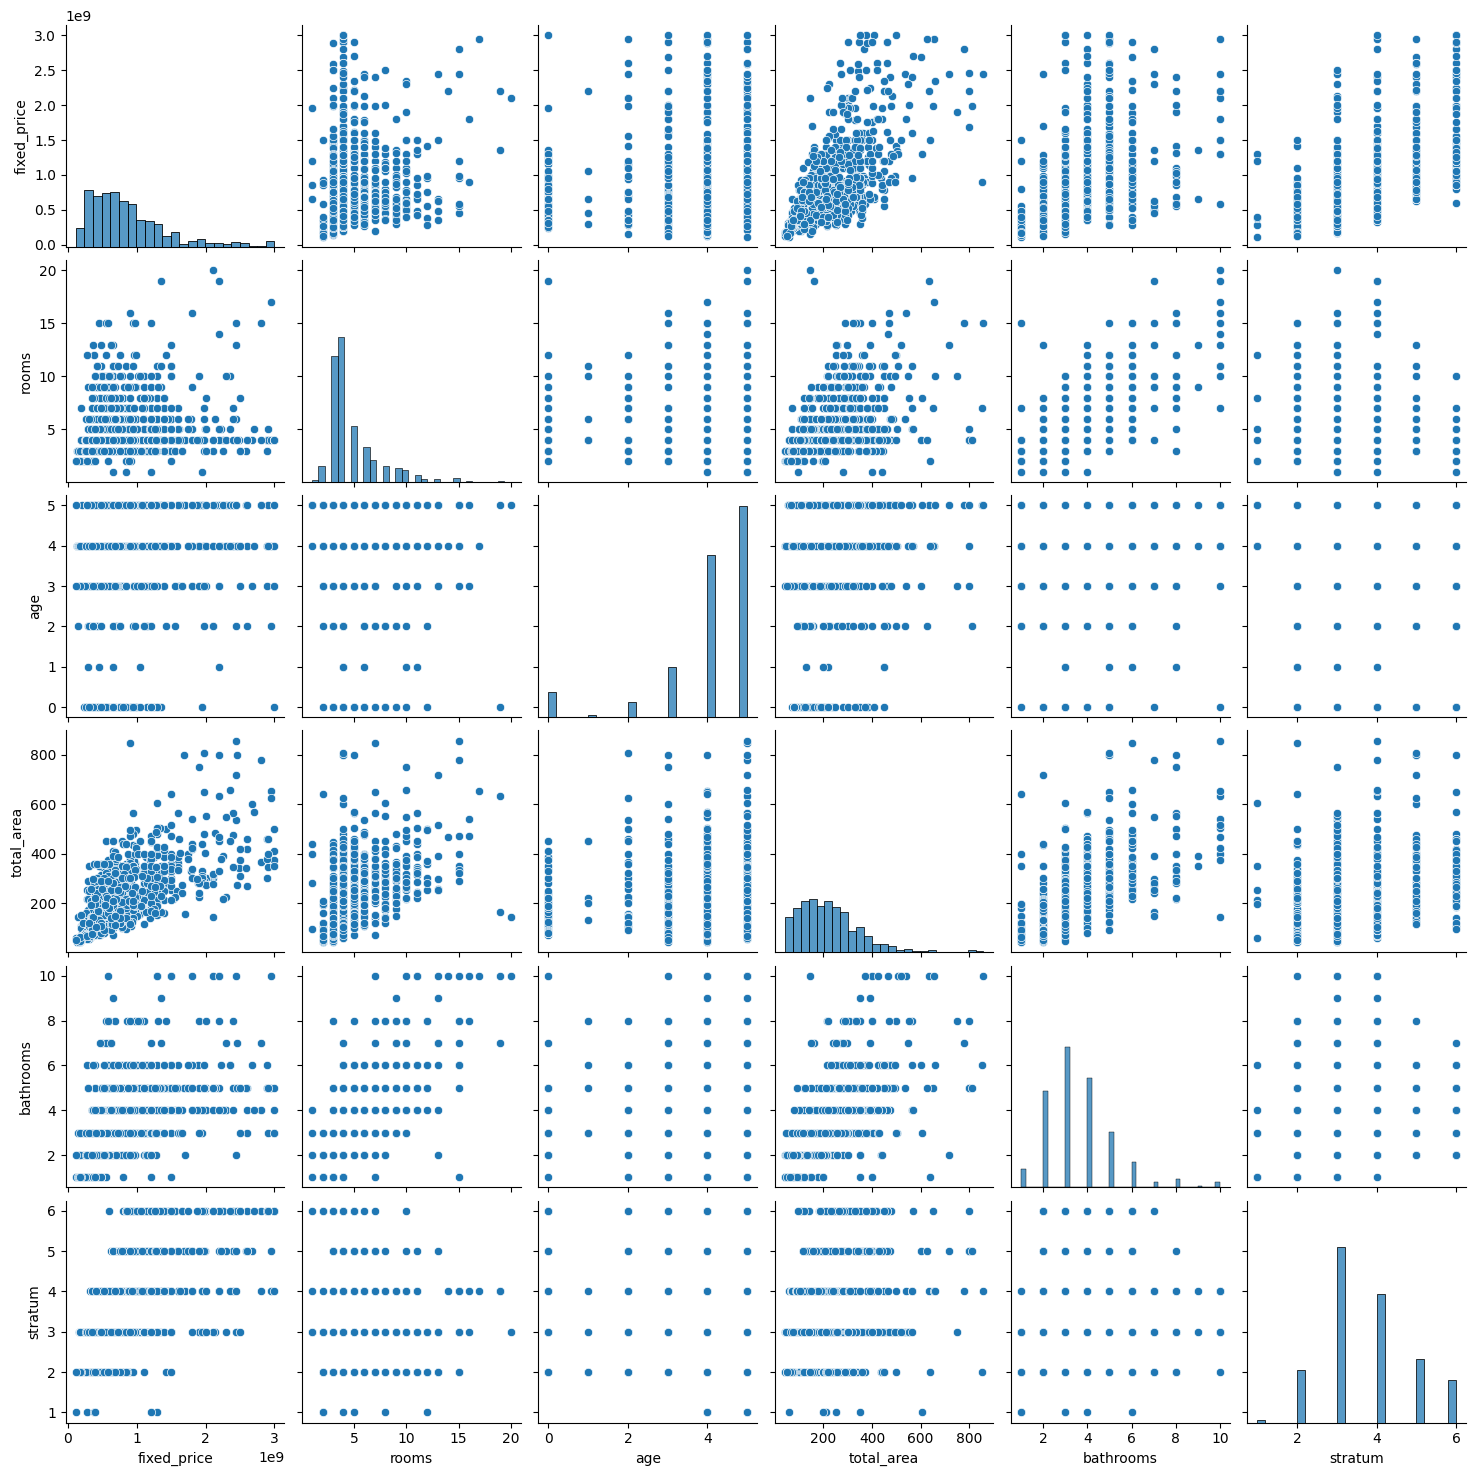

In [33]:
columns_to_pair = ['fixed_price', 'rooms','age', 'total_area', 'bathrooms', 'stratum' ]
sns.pairplot(df_final[columns_to_pair])

In [34]:
df_final[columns_to_pair].info()

<class 'pandas.core.frame.DataFrame'>
Index: 936 entries, 0 to 976
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   fixed_price  936 non-null    float64
 1   rooms        936 non-null    float64
 2   age          936 non-null    int64  
 3   total_area   936 non-null    float64
 4   bathrooms    936 non-null    float64
 5   stratum      936 non-null    float64
dtypes: float64(5), int64(1)
memory usage: 51.2 KB


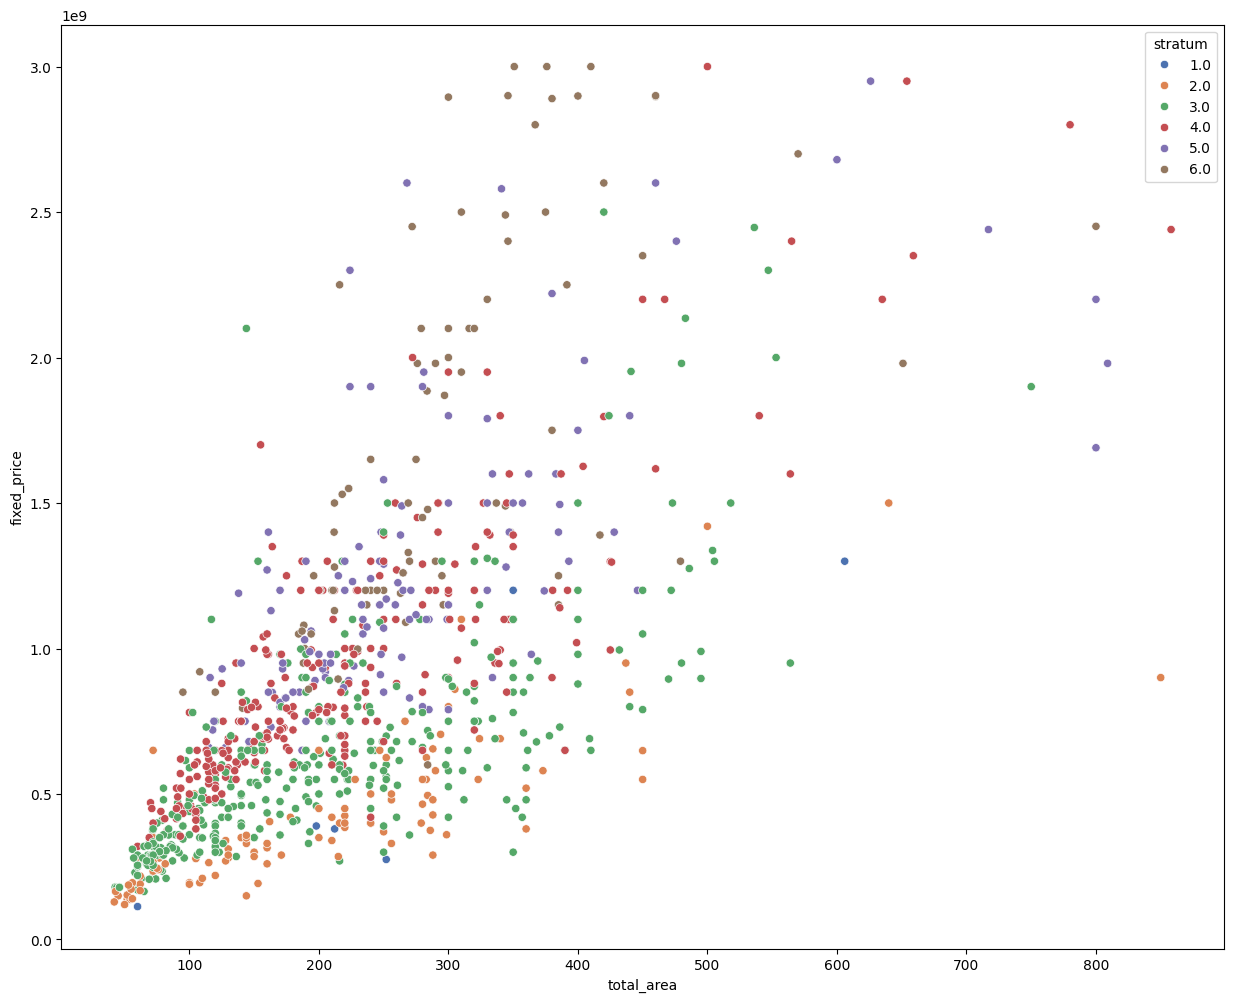

In [35]:
plt.figure(figsize=(15,12))
sns.scatterplot(df_final,  
                x='total_area',
                y='fixed_price',
                hue='stratum', 
                # size='rooms',
                palette="deep"
                )
plt.show()

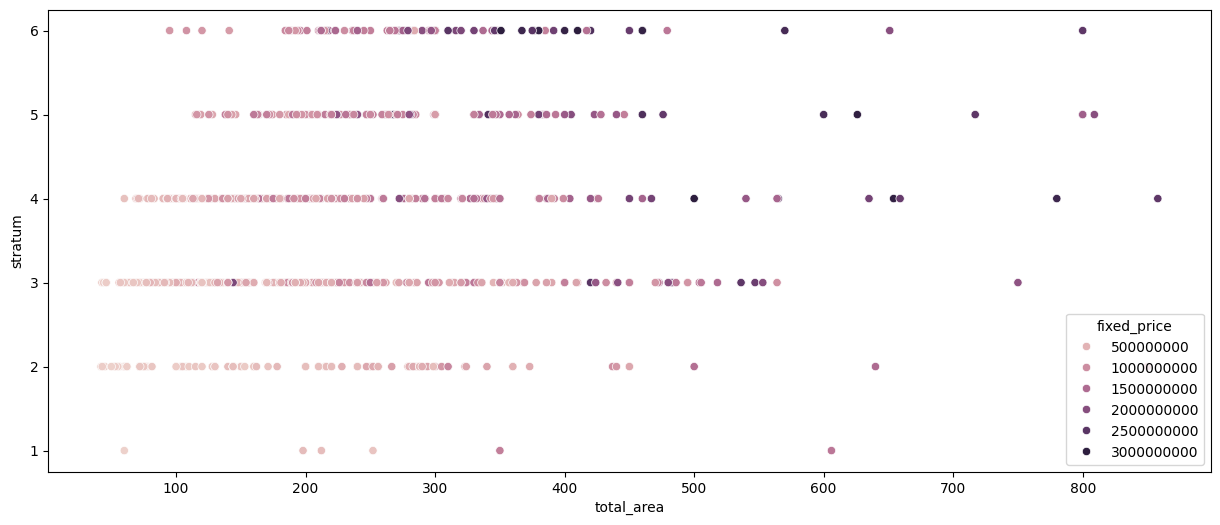

In [36]:
plt.figure(figsize=(15,6))
sns.scatterplot(df_final,  
                x='total_area',
                y='stratum',
                hue='fixed_price', 
                # size='rooms',
                # palette="deep"
                )
plt.show()

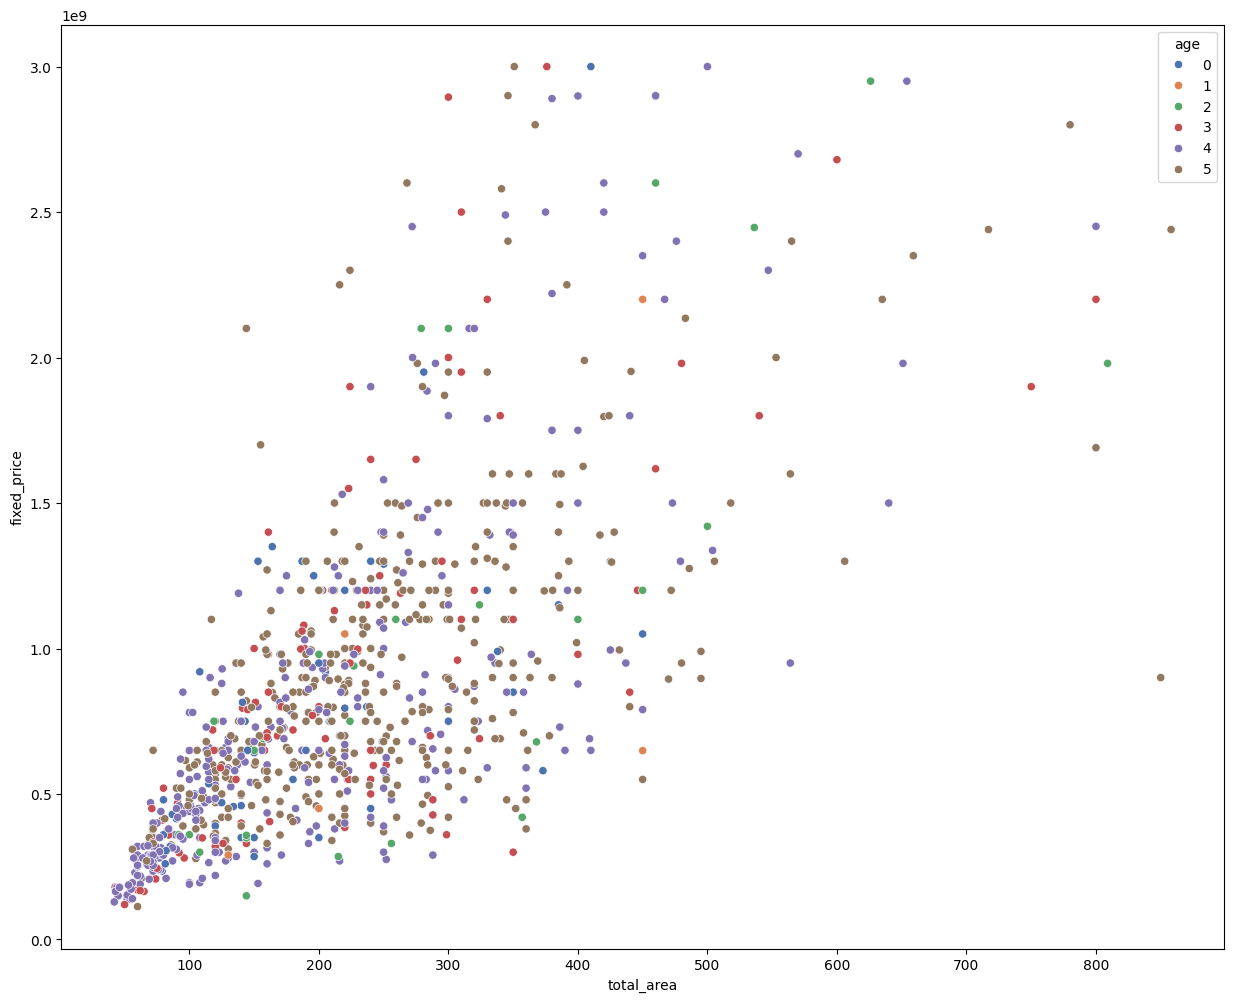

In [37]:
plt.figure(figsize=(15,12))
sns.scatterplot(df_final,  
                x='total_area',
                y='fixed_price',
                hue='age', 
                # size='rooms',
                palette="deep"
                )
plt.show()

In [38]:
len(df_copy)

977

In [39]:
df_copy.to_feather("../data/preprocessed_data.feather")